# Data Analytics Internship 
# Task 2: Visualization using Histogram or Bar Chart

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
df=pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\Akshita Arora\Practice Data\Project 1 - Sales Data Analysis\Technohack\Iris.csv")

In [2]:
df.shape

(150, 6)

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [8]:
df.isnull().sum() # No null Values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
df['Species'].value_counts()/len(df['Species'])          #Frequency count

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64

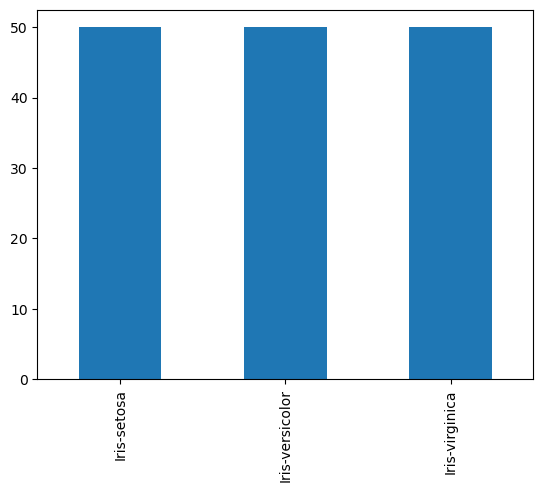

In [11]:
df['Species'].value_counts().plot.bar()    #categorical variable:- Bar Plot
plt.show()

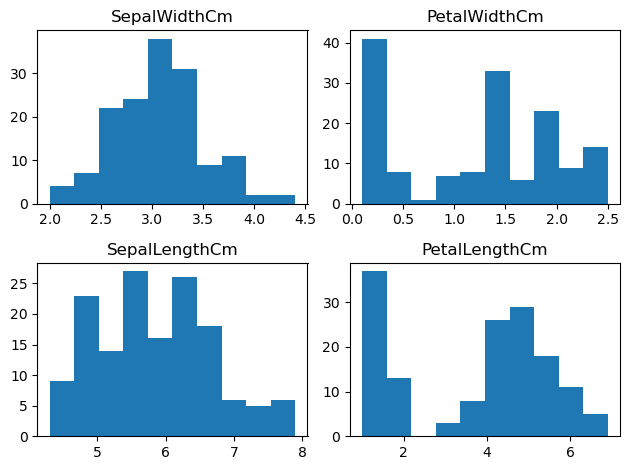

In [12]:
plt.subplot(2,2,1)                   # Continuous variable:- Histogram
plt.hist(df.SepalWidthCm)
plt.title('SepalWidthCm')

plt.subplot(2,2,2)
plt.hist(df.PetalWidthCm)
plt.title('PetalWidthCm')


plt.subplot(2,2,3)
plt.hist(df.SepalLengthCm)
plt.title('SepalLengthCm')

plt.subplot(2,2,4)
plt.hist(df.PetalLengthCm)
plt.title('PetalLengthCm')
plt.tight_layout()
plt.show()

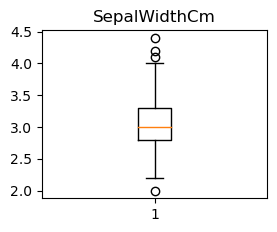

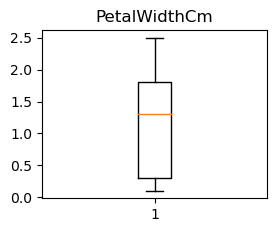

In [13]:
plt.subplot(2,2,1)                        #Boxplot  
plt.boxplot(df.SepalWidthCm)
plt.title('SepalWidthCm')
plt.show()

plt.subplot(2,2,2)
plt.boxplot(df.PetalWidthCm)
plt.title('PetalWidthCm')
plt.show()

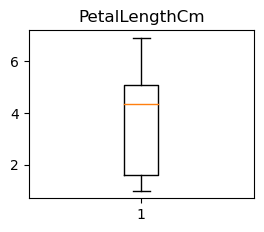

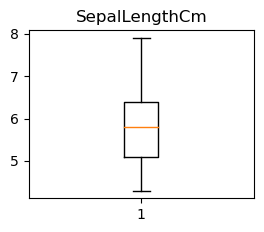

In [14]:
plt.subplot(2,2,3)                                  #Boxplot
plt.boxplot(df.PetalLengthCm)
plt.title('PetalLengthCm')
plt.show()

plt.subplot(2,2,4)
plt.boxplot(df.SepalLengthCm)
plt.title('SepalLengthCm')
plt.show()

In [15]:
#Z_SCORES                                    #Removing Outliers using z_score
outliers=[]
def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    for x in data:
        z_score=(x-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(x)
    return outliers

In [16]:
detect_outliers(df.SepalWidthCm)

[4.4]

In [17]:
#IQR                                               #Removing outlier using IQR
#Sort the data
#Calculate Q1(25%) and Q3(75%)
#IQR(Q3-Q1)
#Find the lower Fence(q1-1.5(iqr))
#Find the upper Fence(q3+1.5(iqr))

In [20]:
## Sort
df=sorted(df)

In [31]:
q1=np.percentile(df.SepalWidthCm,25)
print(q1)

2.8


In [32]:
q3=np.percentile(df.SepalWidthCm,75)
print(q3)

3.3


In [33]:
iqr=q3-q1
print(iqr)

0.5


In [34]:
## Find lower and upper fence
lower_fence=q1-(1.5*iqr)
upper_fence=q3+(1.5*iqr)
print(lower_fence,upper_fence)

2.05 4.05


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

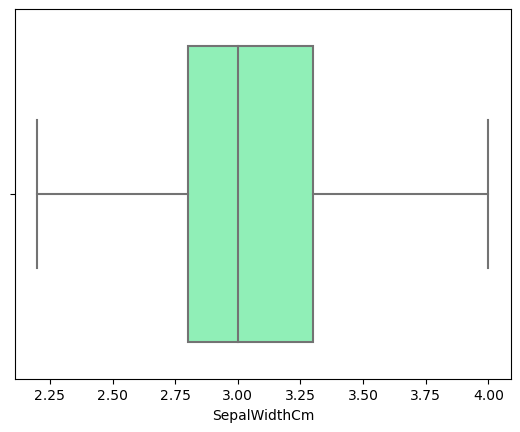

In [45]:
sns.boxplot(df.SepalWidthCm,data=df,palette='rainbow')           #Outliers removed

In [37]:
df.loc[df['SepalWidthCm']<2.05,'SepalWidthCm']=np.mean(df['SepalWidthCm'])
df.loc[df['SepalWidthCm']>4.05,'SepalWidthCm']=np.mean(df['SepalWidthCm'])

Text(0.5, 1.0, 'SepalWidthCm')

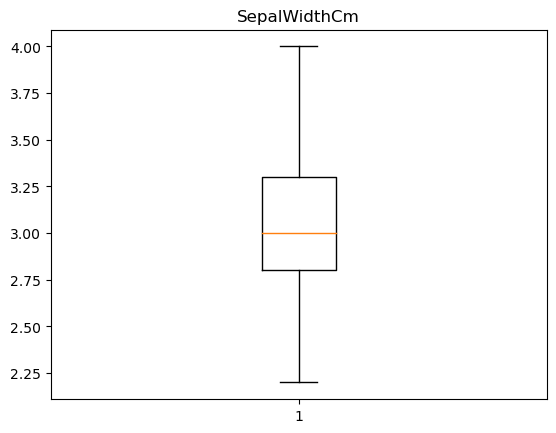

In [38]:
plt.boxplot(df.SepalWidthCm)           #Outliers removed
plt.title('SepalWidthCm')

In [ ]:
sns.barplot(x='Species',y='PetalLengthCm',data=df)

In [ ]:
sns.barplot(x='Species',y='SepalWidthCm',data=df)

In [ ]:
sns.barplot(x='Species',y='PetalWidthCm',data=df)

In [ ]:
df.plot.scatter(x='SepalWidthCm',y='PetalWidthCm')

In [ ]:
df.groupby('Species')['SepalWidthCm'].mean().plot.bar()

In [ ]:
df.groupby('Species')['SepalLengthCm'].mean().plot.bar()

In [ ]:
df.groupby('Species')['PetalLengthCm'].mean().plot.bar()

In [ ]:
df.groupby('Species')['PetalWidthCm'].mean().plot.bar()

In [ ]:
sns.boxplot('Species','SepalLengthCm',data=df)

In [ ]:
sns.boxplot('Species','PetalLengthCm',data=df)

In [ ]:
sns.boxplot('Species','PetalWidthCm',data=df)

In [ ]:
sns.boxplot(data=df,orient='v')

In [ ]:
sns.boxplot('Species','SepalWidthCm',data=df)

In [ ]:
df.corr()

In [ ]:
df['SepalLengthCm'].corr(df['PetalLengthCm'])

In [ ]:
df['PetalWidthCm'].corr(df['PetalLengthCm'])